# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [1]:
# IEEE formatting:
# R.A. Jarvis, "On the identification of the convex hull of a finite set of points in the plane".  Information  Processing  Letters.  2  (1):  18–21.  doi:10.1016/0020-0190(73)90020-3. 
# Inside code, Convex hulls: Jarvis march algorithm (gift-wrapping) - Inside code. (Dec. 26, 2021). Accessed: Feb. 27, 2024. [Online Video]. Available: https://www.youtube.com/watch?v=nBvCZi34F_o 

import math

# find the orientation of three 2D points - to see if the rotation from points is counterclockwise or clockwise based on the middle point (p2)
def orientation(p1 : tuple[int,int],p2 : tuple[int,int] ,p3: tuple[int,int]) -> int:
        # find the difference of the gradients between p3 and p2, and p2 and p1, to check the orientation
        grad_diff = ((p3[1]-p2[1])*(p2[0]-p1[0])) - ((p2[1]-p1[1])*(p3[0]-p2[0]))
        
        # check if the orientation is counterclockwise (so return 1) - as we prefer the orientation to be counterclockwise in the Jarvis March algorithm.
        if grad_diff > 0:
                return 1
        # check if the orientation is clockwise (so return -1)
        elif grad_diff < 0:
                return -1
        # otherwise the orientation will be collinear (so return 0) - so there is no slope but a straight line
        else:
                return 0

# find the distance between two points in the 2D plane
def dist(p1 : tuple[int,int], p2: tuple[int,int]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)

# jarvis march implementation
def jarvismarch(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # find the left-most point
    if len(inputSet) < 3:
        return inputSet
    if len(inputSet) == 3 and orientation(inputSet[0], inputSet[1], inputSet[2]) == 0:
        print("No convex hull printed as 3 points inputed and all 3 are collinear.")
    leftmostPoint = min(inputSet)
    outputSet = []
    while True:
        outputSet.append(leftmostPoint)
        next_point = inputSet[0]
        for point in inputSet:
                rotation = orientation(leftmostPoint, next_point, point)
                # check if the rotation is counterclockwise, where the first point is the next point in the hull, otherwise if rotation is collinear, then check the distance between the leftmost point and the next point, and if the distance is greater than the distance between the leftmost point and the current point, then the next point is the current point.
                if next_point == leftmostPoint or rotation == 1 or (rotation == 0 and dist(leftmostPoint, point) > dist(leftmostPoint,next_point)):
                        next_point = point
        
        # now check for the next point after finding the point that is on the convex hull                
        leftmostPoint = next_point
        # check if the algorithm returns back to the starting point and then end the loop, returning the coordinates of the hull.
        if leftmostPoint == outputSet[0]:
                # convex hull is complete
                break  

    #ADD YOUR CODE HERE

    return outputSet


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [2]:
# Graham Scan Algorithm is taken from Chapter 33 of Introduction to Algorithms (3rd Edition) by Cormen et al. (2009). Python implementation is based on the pseudocode provided in the book.
# R.L. Graham, "An Efficient Algorithm for Determining the Convex Hull of a Finite Planar  Set".  Information  Processing  Letters.  1  (4):  132–133.  doi:10.1016/0020-0190(72)90045-2.
# T.H. Cormen, C.E. Leiserson, R.L. Rivest and C. Stein, "Computational Geometry," in Introduction to Algorithms, 3rd ed. Cambridge, MA, USA: MIT Press, 2009, pp. 1016-1032.

# function to get the polar angle between two points in 2D space - to determine the angle between the x-axis and the line segment connecting the two points, used for sorting the points in the graham scan algorithm.
def getPolarAngle(v1 : tuple[int, int], v2 : tuple[int, int]) -> float:
# calculate the polar angle
        polarAngle = math.atan2(v2[1] - v1[1], v2[0] - v1[0])
        # if the polar angle is negative, then add 2pi to the angle to make it positive, so it is in the range of 0 to 2pi (following polar coordinates convention).
        if polarAngle < 0:
                polarAngle += (2 * math.pi)
        return polarAngle

# function to get the distance between two points in 2D space.
def getDistance(v1 : tuple[int,int],v2 : tuple[int,int]) -> float:
    return math.sqrt((v2[0]-v1[0])**2 + (v2[1]-v1[1])**2)

# cross product is used to determine whether consctuive segments turn left or right or are collinear (straight).
def crossProduct(v1 : tuple[int,int], v2 : tuple[int,int], v3 : tuple[int,int]) -> float:
    # formula for cross product:
    # (p1 - p0) x (p2 - p0) = (x1 - x0)(y2 - y0) - (y1 - y0)(x2 - x0)
    # positive crossproduct means left turn at p1 (counterclockwise), negative value means right turn at p2 (clockwise), and 0 means collinear
    return (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])

# graham scan algorithm with python inbuilt sort function (timsort - O(nlogn) time complexity) (average case) [main function]!
def grahamscan(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # if the inputSet has less than 3 points, then return the inputSet as the convex hull
    if len(inputSet) < 3:
        return inputSet
    # find the point with the minimum y-coordinate or leftmost point in case of a tie
    p0 = min(inputSet, key=lambda x:(x[1], x[0]))
    # Sort the points based on the polar angle, and if the polar angle is the same, then sort based on the furthest distance from p0 in the case of a tie, with a lambda function.
    inputSet = sorted(inputSet, key= lambda x: (getPolarAngle(p0, x), getDistance(p0, x)))
    #inputSet = mergeSort(inputSet, lambda x, y: compare_points(p0, x, y))

    # initialize an empty stack, outputSet, to store the vertices of the convex hull and push the first three points onto the stack
    outputSet = [p0, inputSet[1], inputSet[2]]

    for i in range(3, len(inputSet)):
        # while the angle formed by points next-to-top(s), top(s) and p_i makes a nonleft turn, pop from stack
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], inputSet[i]) <= 0:
            outputSet.pop()
        outputSet.append(inputSet[i])
    return outputSet

# function to compare the points based on the polar angle and distance from p0 (for the other 3 sorting algorithms) - as the graham scan algorithm requires the points to be sorted based on the polar angle (in counterclockwise order) and if the polar angle is the same, then sort based on the distance from p0.
def compare_points(p0 : tuple[int,int], p1 : tuple[int,int], p2 : tuple[int,int]) -> float:
    angle1 = getPolarAngle(p0, p1)
    distance1 = getDistance(p0, p1)
    angle2 = getPolarAngle(p0, p2)
    distance2 = getDistance(p0, p2)
    
    # if polar angles are the same, then sort based on the distance from p0
    if angle1 == angle2:
        return distance1 - distance2
    # otherwise sort based on the polar angle
    else:
        return angle1 - angle2

# Merge Sort - compare is of typehint Callable[[Tuple[int, int], Tuple[int, int]], float]
def mergeSort(inputSet : list[tuple[int,int]], compare, start=0, end=None) -> list[tuple[int,int]]:
    if end is None:
        end = len(inputSet)
    if end - start <= 1:
        return inputSet[start:end]
    mid = (start + end) // 2
    mergeSort(inputSet, compare, start, mid)
    mergeSort(inputSet, compare, mid, end)
    merge(inputSet, compare, start, mid, end)
    return inputSet

def merge(inputSet : list[tuple[int,int]], compare, start : int, mid : int, end : int):
    left = inputSet[start:mid]
    right = inputSet[mid:end]
    i = j = 0
    k = start
    while i < len(left) and j < len(right):
        if compare(left[i], right[j]) <= 0:
            inputSet[k] = left[i]
            i += 1
        else:
            inputSet[k] = right[j]
            j += 1
        k += 1
    while i < len(left):
        inputSet[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        inputSet[k] = right[j]
        j += 1
        k += 1

# Insertion Sort - compare is of typehint Callable[[Tuple[int, int], Tuple[int, int]], float]
def insertionSort(inputSet : list[tuple[int,int]], compare) -> list[tuple[int,int]]:
    for i in range(1, len(inputSet)):
        key = inputSet[i]
        j = i - 1
        while j >= 0 and compare(inputSet[j], key) > 0:
            inputSet[j + 1] = inputSet[j]
            j -= 1
        inputSet[j + 1] = key
    return inputSet

# graham scan with merge sort
def grahamscanMergeSort(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    if len(inputSet) < 3:
        return inputSet
    p0 = min(inputSet, key=lambda x:(x[1], x[0]))
    inputSet = mergeSort(inputSet, lambda x, y: compare_points(p0, x, y))
    outputSet = [p0, inputSet[1], inputSet[2]]
    for i in range(3, len(inputSet)):
        # while the angle formed by points next-to-top(s), top(s) and p_i makes a nonleft turn, pop from stack
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], inputSet[i]) <= 0:
            outputSet.pop()
        outputSet.append(inputSet[i])
    return outputSet

# graham scan with insertion sort
def grahamscanInsertionSort(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
    if len(inputSet) < 3:
        return inputSet
    p0 = min(inputSet, key=lambda x:(x[1], x[0]))
    inputSet = insertionSort(inputSet, lambda x, y: compare_points(p0, x, y))
    outputSet = [p0, inputSet[1], inputSet[2]]
    for i in range(3, len(inputSet)):
        # while the angle formed by points next-to-top(s), top(s) and p_i makes a nonleft turn, pop from stack
        while len(outputSet) > 1 and crossProduct(outputSet[-2], outputSet[-1], inputSet[i]) <= 0:
            outputSet.pop()
        outputSet.append(inputSet[i])
    return outputSet


Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [3]:
# IEEE Formatting:
# Wikipedia. "Chan's algorithm," Wikipedia.org. Accessed: Feb, 29. 2024. [Online]. Available: https://en.wikipedia.org/wiki/Chan%27s_algorithm

# cross product is used to determine whether consctuive segments turn left or right or are collinear (straight).
def crossProduct(v1 : tuple[int,int], v2 : tuple[int,int], v3 : tuple[int,int]) -> int:
    # formula for cross product:
    # (p1 - p0) x (p2 - p0) = (x1 - x0)(y2 - y0) - (y1 - y0)(x2 - x0)
    # positive crossproduct means left turn at p2 (counterclockwise), negative value means right turn at p2 (clockwise), and 0 means collinear
    value = (v2[0] - v1[0]) * (v3[1] - v1[1]) - (v2[1] - v1[1]) * (v3[0] - v1[0])
    if value > 0:
            # left turn
        return 1
    elif value < 0:
            # right turn
        return -1
    else:
            # collinear
        return 0

# find distance between two points on the 2D plane.
def dist(p1 : tuple[int,int], p2: tuple[int,int]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)

# find the point that has the rightmost tangent from current point in one of the subhulls via a modified jarvis march with binary search on one subhull. - taken from https://gist.github.com/tixxit/252229#file-chan-py-L45
def jarvis_binary_search(hull : list[tuple[int,int]], p : tuple[int,int]) -> int:
        left = 0
        right = len(hull)
        middle = 0
        left_prev = crossProduct(p, hull[0], hull[-1])
        left_next = crossProduct(p, hull[0], hull[(left+1) % right])
        while left < right:
                middle = (right + left) // 2
                middle_prev = crossProduct(p, hull[middle], hull[(middle-1) % len(hull)])
                middle_next = crossProduct(p, hull[middle], hull[(middle+1) % len(hull)])
                middle_side = crossProduct(p, hull[left], hull[middle])
                # check if the previous and next turns are not clockwise, then return the middle index as the rightmost tangent.
                if middle_prev != -1 and middle_next != -1:
                        #print("middle before return:", middle)
                        return middle
                # otherwise if the point pointed by middle is counter-clockwise but the point pointed by middle_next is clockwise, then the tangent touches the right chain.
                elif middle_side == 1 and (left_next == -1 or left_prev == left_next) or \
                        middle_side == -1 and middle_prev == -1:
                        # tangent touches the left chain
                        right = middle
                # otherwise tangent touches the right chain - reduce the left index to middle + 1
                else:
                        left = middle + 1
                        left_prev = -middle_next
                        
                        if left < len(hull):
                                left_next = crossProduct(p, hull[left], hull[(left+1) % (len(hull))])
                        else:
                                return -1
        return left

# pick the starting point of the convex hull based on the rightmost point
def pick_start(hulls : list[list[tuple[int,int]]]) -> tuple[int,int]:
    max_point_index = max(((i, j) for i, sublist in enumerate(hulls) for j, point in enumerate(sublist)), key=lambda x: (hulls[x[0]][x[1]][0], -hulls[x[0]][x[1]][1]))
    return max_point_index

# find the index of the next point in the convex hull based on the rightmost tangent - from the current point in the convex hull 
def jarvis_next_ch_pair(hulls : list[list[tuple[int,int]]], pair : tuple[int,int]) -> tuple[int,int]:
    # obtain the current coordinate passed based on the indexes passed in the last element of outputSet.
    current_point = hulls[pair[0]][pair[1]]
    # find the next point in the current subhull
    next = (pair[0], (pair[1] + 1) % len(hulls[pair[0]]))
    for i in range(len(hulls)):
        if i == pair[0]:
            continue
        next_index = jarvis_binary_search(hulls[i], current_point)
        
        # get the coordinate of the next point in the current subhull
        next_point_curr = hulls[next[0]][next[1]]
        
        # get the coordinate of the next point in the next subhull - where the rightmost tangent is found.
        next_point_next = hulls[i][next_index]
        
        # check the turn of the point
        t = crossProduct(current_point, next_point_curr, next_point_next)
        if t == -1 or (t == 0 and dist(current_point, next_point_next) > dist(current_point, next_point_curr)):
            next = (i, next_index)
    return next

# Chan's Algorithm with Binary Search:
def chen(inputSet : list[tuple[int,int]]) -> list[tuple[int,int]]:
        '''
        Returns the list of points that lie on the convex hull (chen's algorithm)
                Parameters:
                        inputSet (list): a list of 2D points
        
                Returns:
                        outputSet (list): a list of 2D points
        '''
        
        if len(inputSet) < 3:
                return inputSet
        
        for m in (2**2**t for t in range(3, len(inputSet))):
                """Partition the inputSet into subsets of size [n/m] with at most m using list slicing and list comprehension, 
                and then compute the convex hull of each subset using Graham's scan 
                - store the vertices in an array in counterclockwise order."""
                subhulls = [grahamscan(inputSet[i:i+m]) for i in range(0, len(inputSet), m)]
                p1 = pick_start(subhulls)
                outputSet = [p1]
                for _ in range(len(inputSet)):
                        # Using a modified Jarvis March with binary search to obtain the next convex hull point and merge the subhulls to form the convex hull.
                        p = jarvis_next_ch_pair(subhulls, outputSet[-1])
                        # If the next point is the starting point, then return the convex hull.
                        if p == outputSet[0]:
                                return[subhulls[i][j] for i, j in outputSet]
                        outputSet.append(p)
        return None



Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [4]:
import random
import math

class TestDataGenerator():
    
    # constructor to initialize the number of points and the radius of the circle (optional) as the default radius is 16383 (half of the maximum value of 32767 for x and y coordinates).
    def __init__(self,num_points : int):
        self.num_points = num_points
        self.radius = 16383
        
    # generate random points in 2D space
    def random_points(self) -> list[tuple[int,int]]:
        rand_points = set()
        while len(rand_points) < self.num_points:
            x = random.randint(0,32767)
            y = random.randint(0,32767)
            if (x,y) not in rand_points:
                rand_points.add((x,y))
        return list(rand_points)
    
    # generate polygon points, where the points are vertices of a polygon
    def generate_polygon_points(self, polygon_sides : int) -> list[tuple[int,int]]:
        # check if the parameter (polygon_sides) is less than 3, then print an error message and return None.
        if polygon_sides < 3:
            raise ValueError("A polygon must have at least 3 sides.")
        
        polygon_points = set()
        centre_x = 16383
        centre_y = 16383

        for i in range(polygon_sides):
            angle = 2 * math.pi * i / polygon_sides
            x = int(round(centre_x + self.radius * math.cos(angle)))
            y = int(round(centre_y + self.radius * math.sin(angle)))
            polygon_points.add((x, y))

        return list(polygon_points)
    
    # generate circle points, where the points are on the circumference of a circle - works about first 500-600 points due to rounding (that all the numbers had to be integers). If less than 20 points, it resembles a polygon.
    def generate_circle_points(self) -> list[tuple[int,int]]:
        circle_points = set()
        centre_x = 16383
        centre_y = 16383

        for i in range(self.num_points):
            angle = 2 * math.pi * i / self.num_points
            x = int(round(centre_x + self.radius * math.cos(angle)))
            y = int(round(centre_y + self.radius * math.sin(angle)))
            circle_points.add((x, y))

        return list(circle_points)
    
    # generate collinear points
    def generate_collinear_points(self) -> list[tuple[int,int]]:
        # randomly pick a gradient
        grad = random.randint(-50,100)
        x = 0
        y = 0
        if grad == 0:
            y = 16383
        elif grad > 0:
            y = 2
            x = 2
        else:
            y = 32765
            x = 2    

        rand_points = set()
        
        # generate the points - while being inside limits of x=[0,32767] and y=[0,32767] - the maximum value for x and y coordinates.
        for _ in range(self.num_points):
            rand_points.add((x,y))
            x += 1
            y += grad  # increment y by the gradient
            if y > 32767 or y < 0:
                break
        return list(rand_points)
   
   
    # check if a point is inside a polygon - used for controlled point generation via ray casting
    def point_inside_polygon(self, x : int, y : int, polygon_points : int) -> bool:
        n = len(polygon_points)
        inside = False

        p1x, p1y = polygon_points[0]
        for i in range(n + 1):
            p2x, p2y = polygon_points[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            x_intersects = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= x_intersects:
                            inside = not inside
            p1x, p1y = p2x, p2y

        return inside 
    
    # controlled point generation for testing (random points inside a polygon) - control the number of points in convex hull, h 
    def controlled_point_generation(self, polygon_sides : int) -> list[tuple[int,int]]:
        # check if the polygon has less than 3 sides or if number of points is smaller than number of polygon sides, then print an error message and end the function.
        if polygon_sides < 3:
            raise ValueError("A polygon must have at least 3 sides.")
        elif self.num_points < polygon_sides:
            raise ValueError("The number of points must be greater than or equal to the number of sides of the polygon.")
        
        # number of points inside the shape
        number_of_points_in_shape = self.num_points - polygon_sides
        
        # Generate the vertices of the polygon
        vertices = self.generate_polygon_points(polygon_sides)
        # Compute the centroid of the polygon
        centroid = [sum(x) / len(x) for x in zip(*vertices)]

        points = set()
        while len(points) < number_of_points_in_shape:
            # generate a random angle
            angle = 2 * math.pi * random.random()

            # generate a random radius
            radius = self.radius * math.sqrt(random.random())

            # calculate the coordinates of the point
            x = centroid[0] + radius * math.cos(angle)
            y = centroid[1] + radius * math.sin(angle)
            
            x = int(round(x))
            y = int(round(y))

            # check if the generated point lies inside the polygon
            if self.point_inside_polygon(x, y, vertices):
                points.add((x, y))
        # add the vertices to the final point list before returning all of the points to be used in the convex hull algorithms.
        points = list(points)
        points += vertices
        return points 
        

Use the cell below to implement the requested **experimental framework** API.

In [11]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    # initialise attributes
    def __init__(self, trials : int, maximum_points : int, step : int):
        self.trials = trials
        self.maximum_points = maximum_points
        self.step = step
        
    # test the algorithm
    def time_algorithm(self,algorithm,points : list[tuple[int,int]]) -> float:
        start = timeit.default_timer()
        algorithm(points)
        end = timeit.default_timer()
        return end - start
    
    # method to test the algorithms for different types of points (random, circle, collinear, controlled) - 
    def test_algorithms(self,algorithm_list,types : str, h = 0):
        times = [[]for i in range(len(algorithm_list))]
        start = h if types == 'controlled' else 0
        point_range = list(range(start,self.maximum_points,self.step))
        for i in range(start,self.maximum_points,self.step):
            print(i)
            for n in range(len(algorithm_list)):
                times[n].append(0)
            for j in range(self.trials):
                data_generator = TestDataGenerator(i)
                if types == 'random':
                    points = data_generator.random_points()
                elif types == 'circle':
                    points = data_generator.generate_circle_points()
                elif types == 'collinear':
                    points = data_generator.generate_collinear_points()
                elif types == 'controlled':
                    if h is None:
                        print("Please specify a value for h")
                        return
                    points = data_generator.controlled_point_generation(h)
                else:
                    raise ValueError("Unknown point type")
                for a in range(len(algorithm_list)):
                    times[a][-1] += self.time_algorithm(algorithm_list[a], points)
            for b in range(len(algorithm_list)):
                times[b][-1] /= self.trials
        colors =['red', 'blue', 'green', 'purple', 'orange']
        for i in range(len(algorithm_list)):
            plt.plot(point_range,times[i],label = algorithm_list[i].__name__,color = colors[i])
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()
    
    # Test Jarvis March for a specified list of h values, where h is the number of points in the convex hull
    def jarvis_h(self, h_values : list[int]):
        n = self.trials
        if not h_values:
            print("Please specify a list of h values.")
            return
        
        co = ['red','green','blue','purple']
        for h,c in zip(h_values,co):
            jarvis_trials = []
            point_range = list(range(h,self.maximum_points,self.step))
            for j in point_range:
                print(j)
                jarvis_time = 0
                for i in range(n):
                    data_generator = TestDataGenerator(j)
                    points = data_generator.controlled_point_generation(h)
                    jarvis_time += self.time_algorithm(jarvismarch, points)
                jarvis_trials.append(jarvis_time/n)
            plt.plot(point_range, jarvis_trials, label = "Jarvis March (h = " + str(h) + ")" , color = c)
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()

    # Test chan's algorithm for a specified list of h values, where h is the number of points in the convex hull.
    def chan_h(self, h_values : list[int]):
        n = self.trials
        if not h_values:
            print("Please specify a list of h values.")
            return
        
        co = ['red','green','blue','purple']
        for h,c in zip(h_values,co):
            chens_trials = []
            point_range = list(range(h,self.maximum_points,self.step))
            for j in point_range:
                print(j)
                chen_time = 0
                for i in range(n):
                    data_generator = TestDataGenerator(j)
                    points = data_generator.controlled_point_generation(h)
                    chen_time += self.time_algorithm(chen, points)
                chens_trials.append(chen_time/n)
            plt.plot(point_range, chens_trials, label = "Chen (h = " + str(h) + ")" , color = c)
        
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()
        
    
    def graham_test(self):
        n = self.trials
        graham_trials = []
        grahammerge_trials = []
        grahaminsertion_trials = []
        point_range = list(range(0,self.maximum_points,self.step))
        for j in point_range:
            print(j)
            graham_time = 0
            grahammerge_time = 0
            grahaminsertion_time = 0
            for i in range(n):
                data_generator = TestDataGenerator(j)
                points = data_generator.random_points()
                graham_time += self.time_algorithm(grahamscan, points)
                grahammerge_time += self.time_algorithm(grahamscanMergeSort, points)
                grahaminsertion_time += self.time_algorithm(grahamscanInsertionSort, points)
            graham_trials.append(graham_time/n)
            grahammerge_trials.append(grahammerge_time/n)
            grahaminsertion_trials.append(grahaminsertion_time/n)
    
        plt.plot(point_range, graham_trials, label = "Graham Scan with Python in-built sort", color = 'blue')
        plt.plot(point_range, grahammerge_trials, label = "Graham Scan with Merge Sort", color = 'green')
        plt.plot(point_range, grahaminsertion_trials, label = "Graham Scan with Insertion Sort", color = 'purple')
        plt.legend()
        fig = plt.gcf()
        plt.show()
        
    def graham_average_vs_worst(self):
        graham_average_trials = []
        graham_worst_trials = []
        point_range = list(range(0,self.maximum_points,self.step))
        for val in point_range:
            graham_average_time = 0
            graham_worst_time = 0
            for i in range(self.trials):
                data_generator = TestDataGenerator(val)
                points = data_generator.random_points()
                reverse_sort_points = sorted(points, key=lambda x: (x[1],x[0]), reverse= True)
                graham_average_time += self.time_algorithm(grahamscan, points)
                graham_worst_time += self.time_algorithm(grahamscan, reverse_sort_points)
            graham_average_trials.append(graham_average_time/self.trials)
            graham_worst_trials.append(graham_worst_time/self.trials)
            
        plt.title("Graham Scan (Average vs Worst Case)")
        plt.plot(point_range, graham_average_trials, label = "Average Case", color = 'blue')
        plt.plot(point_range, graham_worst_trials, label = "Worst Case", color = 'green')
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()
        
    def jarvis_average_vs_worst(self):
        jarvis_average_trials = []
        jarvis_worst_trials = []
        point_range = list(range(0,self.maximum_points,self.step))
        for val in point_range:
            jarvis_average_time = 0
            jarvis_worst_time = 0
            for i in range(self.trials):
                data_generator = TestDataGenerator(val)
                points = data_generator.random_points()
                circle_points = data_generator.generate_circle_points()
                jarvis_average_time += self.time_algorithm(jarvismarch, points)
                jarvis_worst_time += self.time_algorithm(jarvismarch, circle_points)
            jarvis_average_trials.append(jarvis_average_time/self.trials)
            jarvis_worst_trials.append(jarvis_worst_time/self.trials)
            
        plt.title("Jarvis March (Average vs Worst Case)")
        plt.plot(point_range, jarvis_average_trials, label = "Average Case", color = 'blue')
        plt.plot(point_range, jarvis_worst_trials, label = "Worst Case", color = 'green')
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()
                
    def chan_average_vs_worst(self):
        chan_average_trials = []
        chan_worst_trials = []
        point_range = list(range(0,self.maximum_points,self.step))
        for val in point_range:
            chan_average_time = 0
            chan_worst_time = 0
            for i in range(self.trials):
                data_generator = TestDataGenerator(val)
                points = data_generator.random_points()
                circle_points = data_generator.generate_circle_points()
                chan_average_time += self.time_algorithm(chen, points)
                chan_worst_time += self.time_algorithm(chen, circle_points)
            chan_average_trials.append(chan_average_time/self.trials)
            chan_worst_trials.append(chan_worst_time/self.trials)
            
        plt.title("Chan's Algorithm (Average vs Worst Case)")
        plt.plot(point_range, chan_average_trials, label = "Average Case", color = 'blue')
        plt.plot(point_range, chan_worst_trials, label = "Worst Case", color = 'green')
        plt.legend()
        fig = plt.gcf()
        fig.set_size_inches(15,15)
        plt.show()
        
    # Function to generate scatter plots to visualise convex hull for the three different algorithms
    def draw_plot_graph(self,num_points : int, point_type : str, h = 0):
        data_generator = TestDataGenerator(num_points)
        if point_type.lower() == 'controlled':
            # check if there is a specified number of convex hull points
            if h is None:
                # raise exception if h is not specified
                raise ValueError("Please specify the value of h for controlled point generation.")
            points = data_generator.controlled_point_generation(h)
        elif point_type.lower() == 'random':
            points = data_generator.random_points()
        elif point_type.lower() == 'circle':
            points = data_generator.generate_circle_points()
        elif point_type.lower() == 'collinear':
            points = data_generator.generate_collinear_points()
            
        points = data_generator.random_points()
        x = [i[0] for i in points]
        y = [i[1] for i in points]
        fig = plt.figure(figsize=(10, 30))

        # Jarvis march plot
        plt.subplot(3, 1, 1)
        start_time = timeit.default_timer()
        jarvis_march_points = jarvismarch(points)
        end_time = timeit.default_timer()
        jarvis_time = round(end_time - start_time, 5)
        jarvis_march_points.append(jarvis_march_points[0])
        jarvis_x = [i[0] for i in jarvis_march_points]
        jarvis_y = [i[1] for i in jarvis_march_points]
        plt.scatter(x,y, color = 'blue', s = 1)
        plt.scatter(jarvis_x, jarvis_y, color = 'red', s = 5)
        plt.plot(jarvis_x, jarvis_y, color = 'red')
        plt.title(f"Jarvis March (Time: {jarvis_time}s)")

        # Graham's scan plot
        plt.subplot(3, 1, 2)
        start_time = timeit.default_timer()
        graham_points = grahamscan(points)
        end_time = timeit.default_timer()
        graham_time = round(end_time - start_time, 5)
        graham_points.append(graham_points[0])
        graham_x= [i[0] for i in graham_points]
        graham_y = [i[1] for i in graham_points]
        plt.scatter(x,y, color = 'blue', s = 1)
        plt.scatter(graham_x, graham_y, color = 'red', s = 5)
        plt.plot(graham_x, graham_y, color = 'red')
        plt.title(f"Graham's Scan (Time: {graham_time}s)")

        # Chan's algorithm plot
        plt.subplot(3, 1, 3)
        start_time = timeit.default_timer()
        chan_points = chen(points)
        end_time = timeit.default_timer()
        chan_time = round(end_time - start_time, 5)
        chan_points.append(chan_points[0])
        chan_x= [i[0] for i in chan_points]
        chan_y = [i[1] for i in chan_points]
        plt.scatter(x,y, color = 'blue', s = 1)
        plt.scatter(chan_x, chan_y, color = 'red', s = 5)
        plt.plot(chan_x, chan_y, color = 'red')
        plt.title(f"Chan's Algorithm (Time: {chan_time}s)")
        plt.show()

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

In [12]:
# ADD YOUR TEST CODE HERE 
# ADD YOUR TEST CODE HERE 
# Create an instance of TestDataGenerator
data_generator = TestDataGenerator(43211)

points = data_generator.random_points()

## Jarvis March

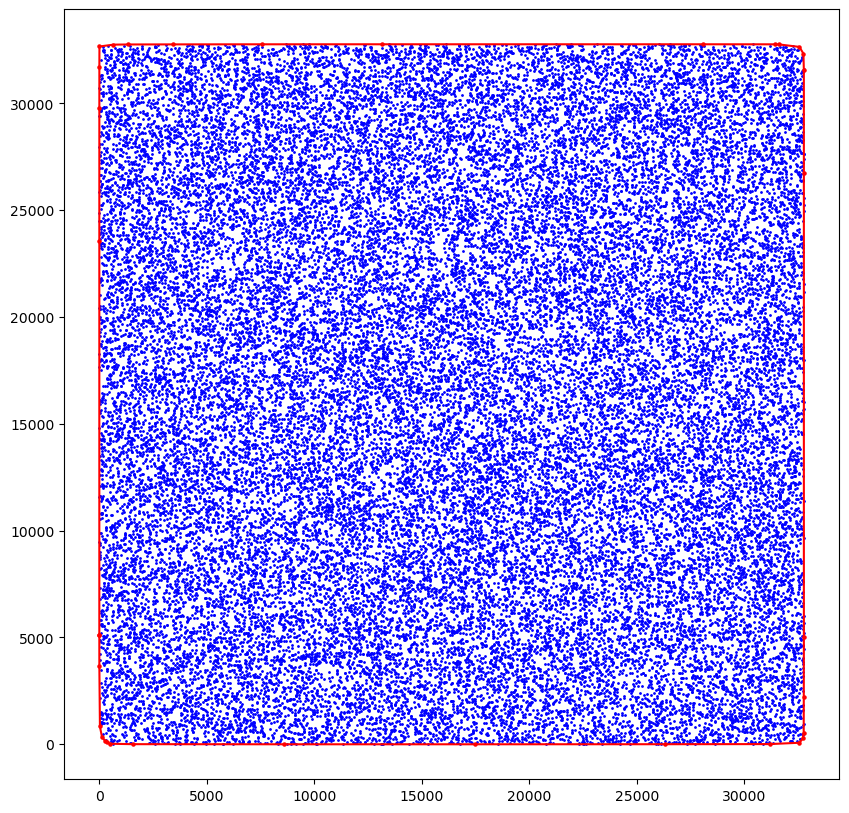

In [13]:
jarvis_march_points = jarvismarch(points)
jarvis_march_points.append(jarvis_march_points[0])

x = [i[0] for i in points]
y = [i[1] for i in points]

jarvis_x = [i[0] for i in jarvis_march_points]
jarvis_y = [i[1] for i in jarvis_march_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(jarvis_x, jarvis_y, color = 'red', s = 5)
plt.plot(jarvis_x, jarvis_y, color = 'red')
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.show()

## Graham Scan

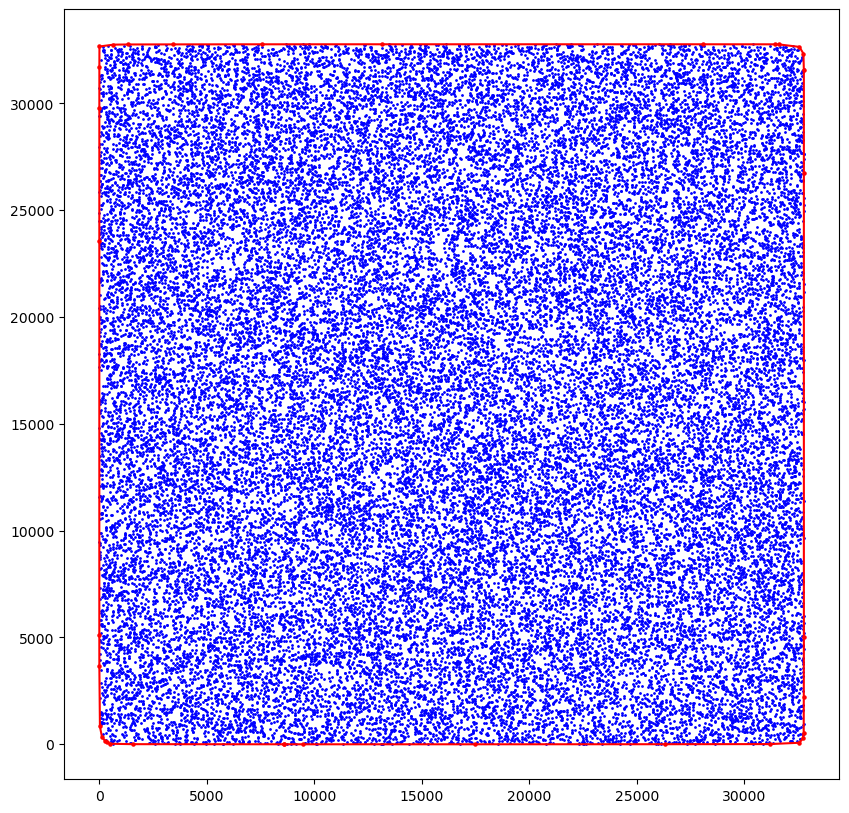

In [14]:
graham_points = grahamscan(points)
graham_points.append(graham_points[0])
x = [i[0] for i in points]
y = [i[1] for i in points]
graham_x= [i[0] for i in graham_points]
graham_y = [i[1] for i in graham_points]

plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(graham_x, graham_y, color = 'red', s = 5)
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.plot(graham_x, graham_y, color = 'red')

## Chan Algorithm

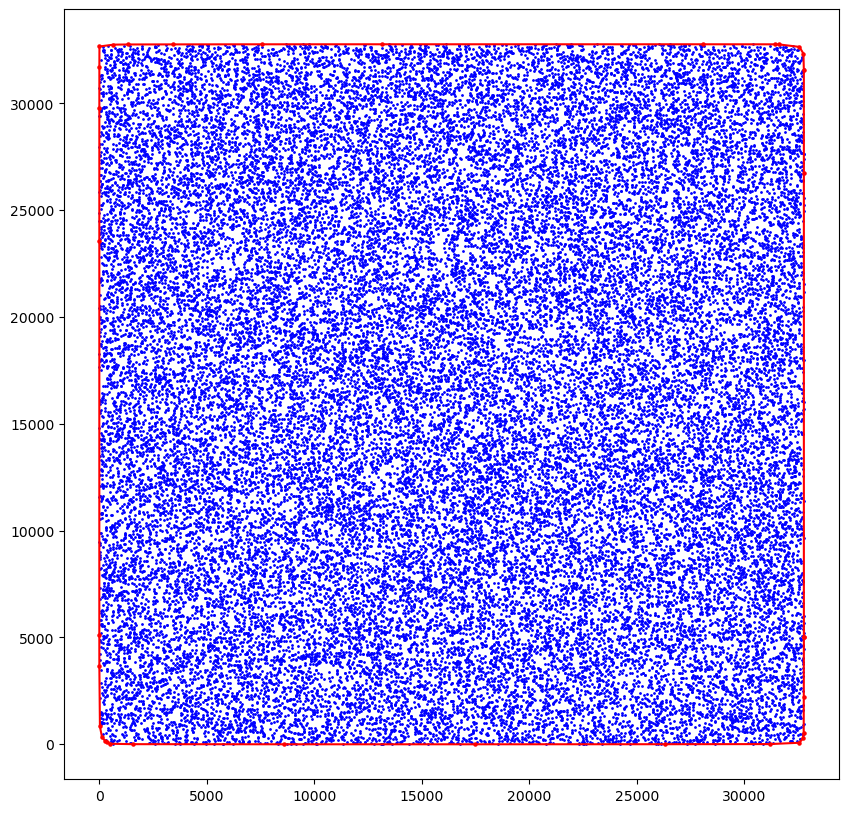

In [15]:
chan_points = chen(points)
chan_points.append(chan_points[0])
x = [i[0] for i in points]
y = [i[1] for i in points]
chan_x= [i[0] for i in chan_points]
chan_y = [i[1] for i in chan_points]
fig = plt.gcf()
fig.set_size_inches(10, 10)
"""plt.xlim(-100, 32869)
plt.ylim(-100, 32869)"""
plt.scatter(x,y, color = 'blue', s = 1)
plt.scatter(chan_x, chan_y, color = 'red', s = 5)
plt.plot(chan_x, chan_y, color = 'red')


In [16]:
# Check if convex hulls match (after appending the first point) - initial checks

print(len(jarvis_march_points) == len(graham_points))
print(len(graham_points) == len(chan_points))
print("Number of jarvis points:",len(jarvis_march_points))
print("Number of chan points:",len(chan_points))
print("Number of graham points:",len(graham_points))

False
False
Number of jarvis points: 34
Number of chan points: 34
Number of graham points: 35


In [17]:
#Usage: ExperimentalFramework(trials : int, maximum_points : int, step : int)
# trials - T, number of trials
# maximum_points - M, maximum number of points 
# step - S, step size for the number of points (increment)

# Methods:
# time_algorithm(algorithm, points) - times the algorithm for N, number of points generated
# test_algorithms(algorithm_list,types : str, h = 0) - test the algorithms for different types of points (specified by the types parameter). Only takes: "random", "circle", "collinear", "controlled". h is the number of points in the convex hull (only for controlled point generation).
# jarvis_h(h_values : list[int]) - test Jarvis March for a specified list of h values, where h_values is the list of number of points in the convex hull, denoted as H
# chan_h(h_values : list[int]) - test chan's algorithm for a specified list of h values, where h_values is the list of number of points in the convex hull, denoted as H
# graham_test() - test graham scan with python in-built sort, graham scan with merge sort, and graham scan with insertion sort (as graham scan is dependent on the sorting algorithm used) - can be used to determine average case vs worst case (based on sorting algorithm).
# jarvis_average_vs_worst() - test jarvis march for average (random points) vs worst case (circle points)
# chan_average_vs_worst() - test chan's algorithm for average (random points) vs worst case (circle points)
# draw_plot_graph(num_points : int, point_type : str, h = 0) - generate scatter plots to visualise convex hull for the three different algorithms. Note: h needs to be specified for only controlled point generation (an error is raised if h is not specified). 
#                                                            - num_points is the number of points to be generated denoted as n, and point_type is the type of points to be generated, either (random, circle, collinear, controlled), in string s.

# How to call methods:
# Create an instance of ExperimentalFramework (e.g. ex = ExperimentalFramework(5,[i for i in range(5,501,100)]
# Call the method using the instance of ExperimentalFramework (e.g. ex.test_algorithms([jarvismarch,grahamscan,chen],"random"))

ex = ExperimentalFramework(5, 10001, 1000)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


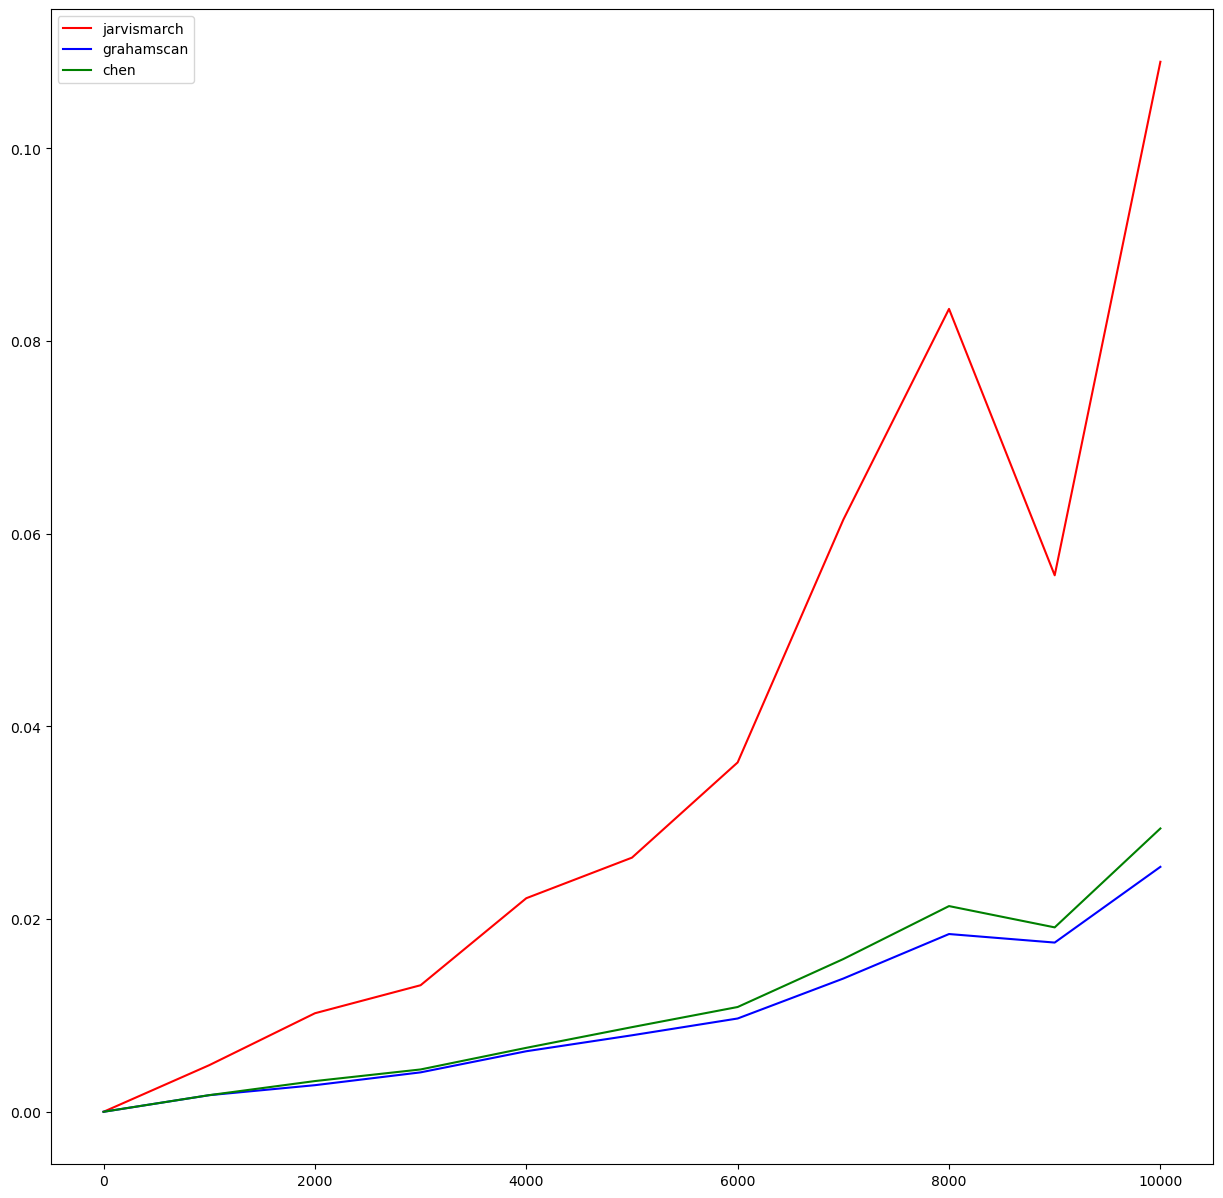

In [19]:
ex.test_algorithms([jarvismarch,grahamscan,chen], "random")

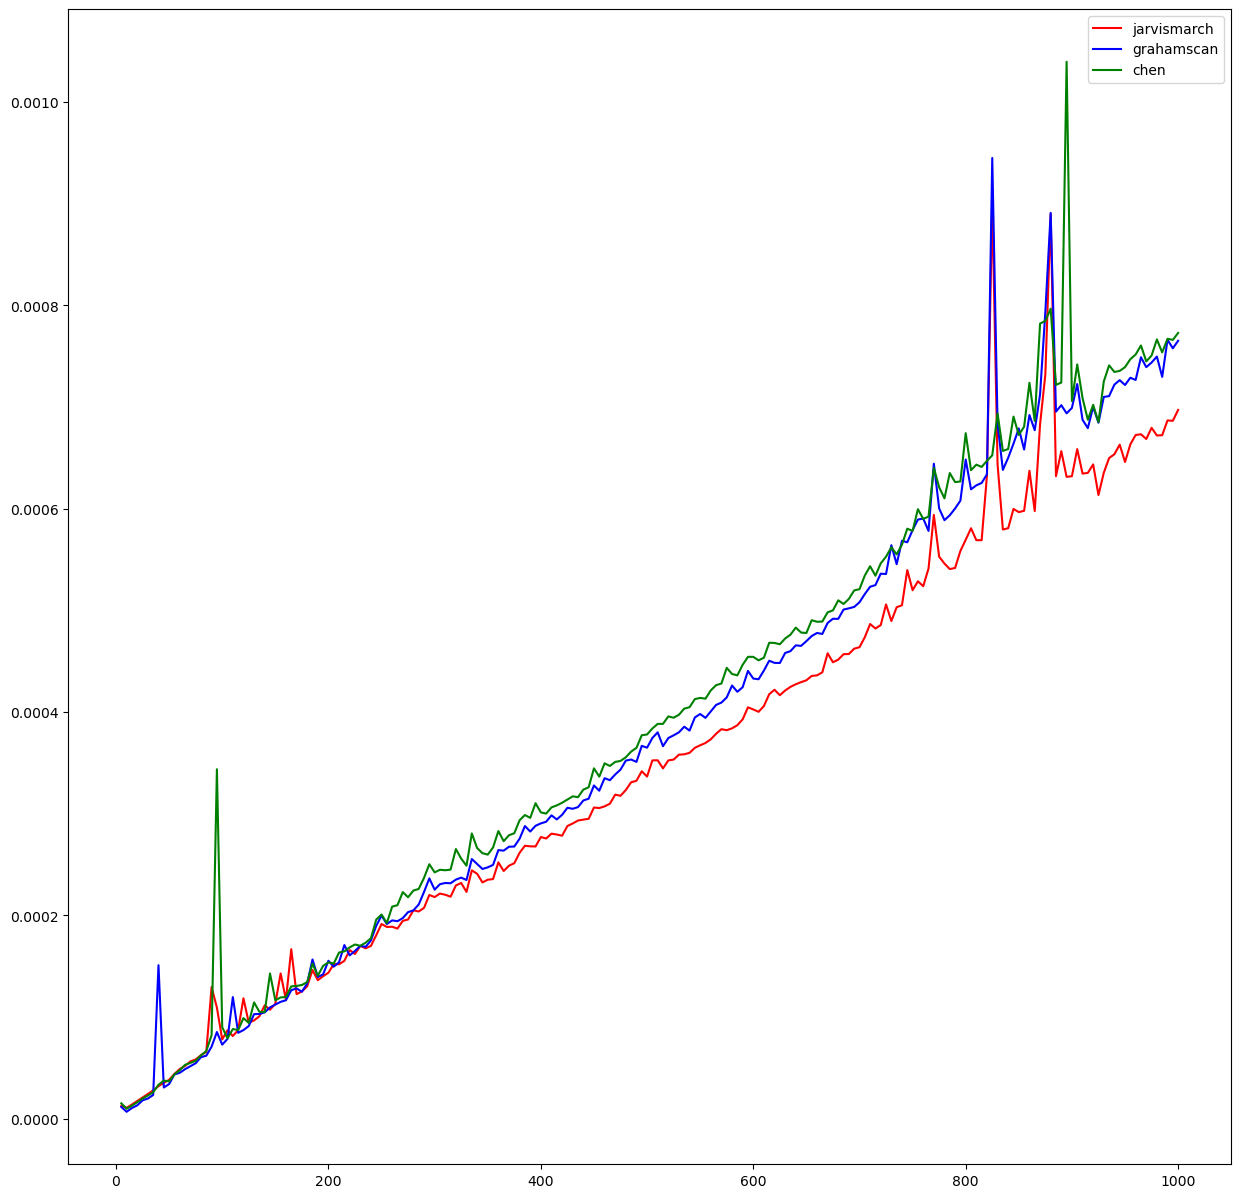

In [64]:
ex.test_algorithms(h=5,algorithm_list=[jarvismarch,grahamscan,chen],types='controlled')

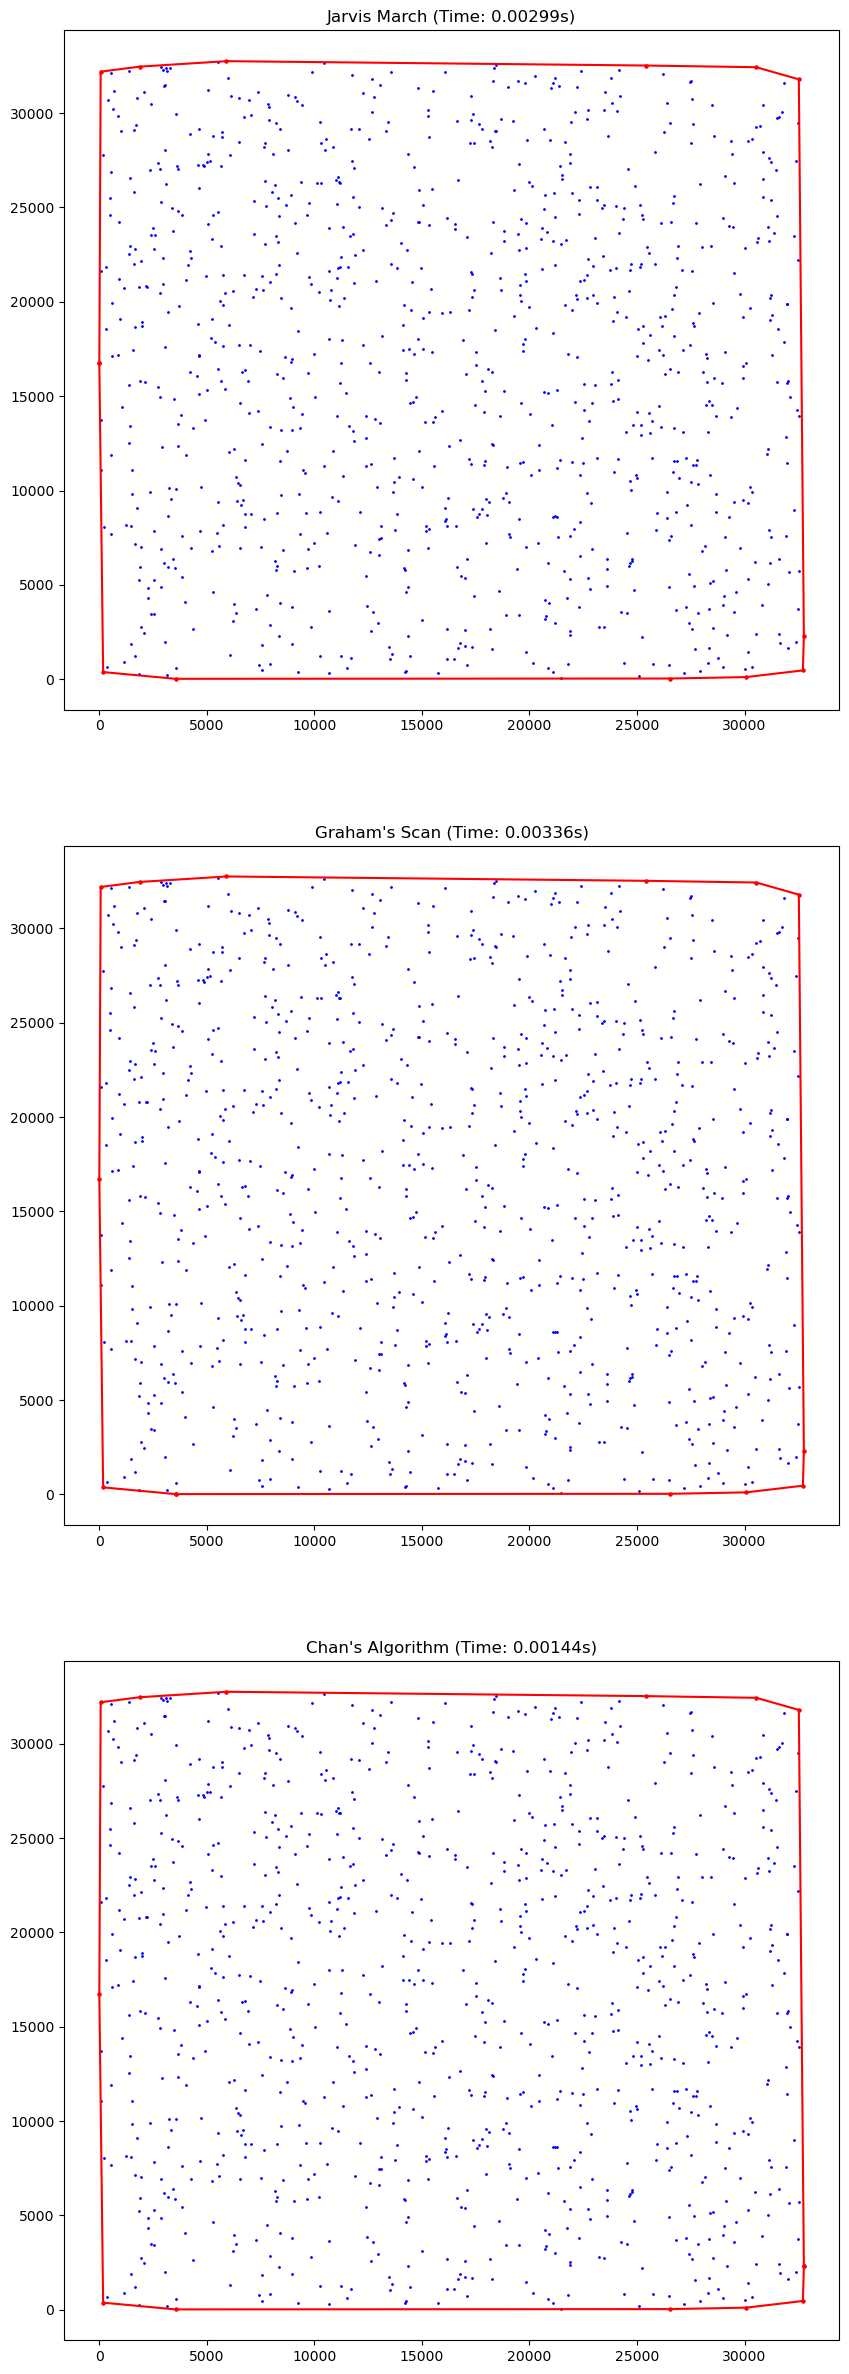

In [67]:
ex.draw_plot_graph(1000, 'random')